#### Final Project Submission

* <t>Student name:</t> Brycen Wong
* <t>Student pace:</t> Self Paced
* <t>Scheduled project review date/time:</t> Sometime in May
* <t>Instructor name:</t> Eli

### Table of Contents


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

#https://pypi.org/project/stargazer/
from stargazer.stargazer import Stargazer 

#https://stackoverflow.com/questions/25698448/how-to-embed-html-into-ipython-output
from IPython.core.display import display, HTML 

### Obtaining the Data

In [2]:
# Read *.csv file as a pandas DataFrame
df = pd.read_csv('kc_house_data.txt')

print('*** Summary of DataFrame ***')
print(df.info())

*** Summary of DataFrame ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memor

In [3]:
# Change to correct Data Types
df.waterfront = df.waterfront.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')
df.view = df.view.astype('category')
df.sqft_basement.replace(['?'], '0', inplace=True)
df.sqft_basement = df.sqft_basement.astype('float').astype('int')

print('*** Summary of DataFrame ***')
print(df.info())

*** Summary of DataFrame ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null category
view             21534 non-null category
condition        21597 non-null category
grade            21597 non-null category
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(4), float64(6), int64(

### Initial Variables to Remove

For this analysis, we are concerned with the features of the house (or neighbors) and not id or geographic considerations. Because of this, we remove the following variables.
- id
- zipcode
- lat and long

In [4]:
# Remove id, zipcode, lat, long
df.drop(['id', 'zipcode', 'lat', 'long'], axis = 1, inplace = True)

print('*** Summary of DataFrame ***')
print(df.info())

*** Summary of DataFrame ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null category
view             21534 non-null category
condition        21597 non-null category
grade            21597 non-null category
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(4), float64(4), int64(8), object(1)
memory usage: 2.2+ MB
None


### Check for Multicollinearity

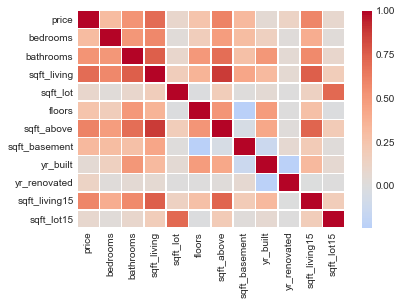

In [5]:
df_predictors = df.iloc[:,:]
df_target = df.iloc[:,2:3]

# draw the heatmap
sns.heatmap(df_predictors.corr(), center=0, linewidths=.5, cmap = 'coolwarm');

### Other Variables to Remove

We observe multicollinearity in sqft_living, which correlates with:
- bathrooms
- sqft_above
- and sqft_living15
Because of this, I decide to remove these variables.

In [6]:
# Remove bathroom, sqft_above, sqft_living15
df.drop(['bathrooms', 'sqft_above', 'sqft_living15'], axis = 1, inplace = True)

print('*** Summary of DataFrame ***')
print(df.info())

*** Summary of DataFrame ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null category
view             21534 non-null category
condition        21597 non-null category
grade            21597 non-null category
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
sqft_lot15       21597 non-null int64
dtypes: category(4), float64(3), int64(6), object(1)
memory usage: 1.7+ MB
None


### Variables of Interest

For this analysis, our base model will include the following variables:
- Bedroom
- Floors
- Living Squarefootage
- Lot Squarefootage
- Basement Squarefootage
- Year Built
- Neighbor Lot Squarefootage

We will look at the effect of adding these variables to the base model:
- Housing grades
- View identifiers
- Renovation times
- Waterfront Presence

In [7]:
===

SyntaxError: invalid syntax (<ipython-input-7-3dd4ea5ba507>, line 1)

### Diagnostics

First we will diagnose the data to see if anything looks strange. In particular, we will look for:

- Missing Values
- Nonsense Values
- Judging Datatype Changes
- Other Stuff

In [ ]:
# check all datatypes first
print('\n*** Data Types ***\n')
print(df.dtypes)

### `bedrooms`

#### Description
`bedrooms` describes number of bedrooms. 

#### Processing
To process `bedrooms`, I am going to leave as is.

### `floors`

#### Description
`floors` describes number of floors. 

#### Processing
To process `floors`, I am going to leave as is.

### `sqft_living`

#### Description
`sqft_living` describes the square footage of the house. 

#### Processing
To process `sqft_living`, I am going to ____.

### `sqft_lot`

#### Description
`sqft_lot` describes ____. 

#### Processing
To process sqft_lot, I am going to ____.

### `sqft_basement`

#### Description
`sqft_basement` describes ____. 

#### Processing
To process `sqft_basement`, I am going to ____.

### `yr_built`

#### Description
`yr_built` describes ____. 

#### Processing
To process `yr_built`, I am going to ____.

### `sqft_lot15`

#### Description
`sqft_lot15` describes ____. 

#### Processing
To process `sqft_lot15`, I am going to ____.

### `grade`

#### Description
`grade` describes ____. 

#### Processing
To process `grade`, I am going to ____.

### `condition`

#### Description
`condition` describes ____. 

#### Processing
To process `condition`, I am going to ____.

### `view`

#### Description
`view` describes ____. 

#### Processing
To process `view`, I am going to ____.

### `waterfront`

#### Description
`waterfront` describes ____. 

#### Processing
To process `waterfront`, I am going to ____.

In [ ]:
# Create list of feature columns
starting_cols = [ 'bedrooms', 'floors', 'sqft_living', 'sqft_lot',
                 'sqft_basement', 'yr_built', 'sqft_lot15']

grade_cols = ['grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
              'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13']

view_cols = ['view_1.0', 'view_2.0', 'view_3.0', 'view_4.0']

condition_cols = ['condition_2', 'condition_3', 'condition_4', 'condition_5']

renovation_cols = ['renovated_20th century', 'renovated_21st century']

waterfront_cols = ['waterfront_0.0']

feature_cols = starting_cols + 
                grade_cols + 
                view_cols + 
                condition_cols + 
                renovation_cols + 
                waterfront_cols

In [ ]:
# optional preemptive modeling on unprocessed data

# let's see how this data looks without any processing

# Set exogenous (y) variable with no log transform
endogenous_variable = df.price

# Model 1: price = bedroom + const
model1_exogenous_variables = ["bedrooms"]
model1 = sm.OLS(endog=endogenous_variable, exog=sm.add_constant(df[model1_exogenous_variables])).fit()

# Model 2: price = bathroom + const
model2_exogenous_variables = ["bathrooms"]
model2 = sm.OLS(endog=endogenous_variable, exog=sm.add_constant(df[model2_exogenous_variables])).fit()

# Model 3: price = bedroom + bathroom + const
model3_exogenous_variables = ['bedrooms', 'bathrooms']
model3 = sm.OLS(endog=endogenous_variable, exog=sm.add_constant(df[model3_exogenous_variables])).fit()

# Model 4: ...
model4_exogenous_variables = ['sqft_living', 'sqft_lot']
model4 = sm.OLS(endog=endogenous_variable, exog=sm.add_constant(df[model4_exogenous_variables])).fit()

# Model 5: ...
model5_exogenous_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot' ]
model5 = sm.OLS(endog=endogenous_variable, exog=sm.add_constant(df[model5_exogenous_variables])).fit()

# Create Table 1
table1 = Stargazer([model1, model2, model3, model4, model5])
table1_html = HTML(table1.render_html())

# Display Table 
display(table1_html)

#### Looking at a model:
1. (Dataset)
2. Model Variables Chosen
3. Significance of Variables
4. Explanatory Power of the Model (R^2)

#### Comparing Two Models:
5. Describe the difference of 1 between the two
5. Describe the difference of 2 between the two
5. Describe the difference of 3 between the two
5. Describe the difference of 4 between the two


In [ ]:
# Set exogenous (y) variable
endogenous_variable = ['price']

# All (Yes/No) Waterfront
df_all = df
df_all.waterfront = df_all.waterfront.astype('float64')

# Subset by Yes Waterfront
dfyw = df[df.waterfront == 1]

# Subset by No Waterfront
dfnw = df[df.waterfront == 0]



# Model 6: price = bedrooms + bathrooms + sqft_living + sqft_lot + const
# Sample: Only Yes Waterfront Properties
model6_exogenous_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot' ]
model6 = sm.OLS(endog=dfyw[endogenous_variable], exog=sm.add_constant(dfyw[model6_exogenous_variables])).fit()

# # Model 7: price = bedrooms + bathrooms + sqft_living + sqft_lot + const
# # Sample: Everyone
# model7_exogenous_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront']
# model7 = sm.OLS(endog=df_all[endogenous_variable], exog=sm.add_constant(df_all[model7_exogenous_variables])).fit()

# Model 8: price = bedrooms + bathrooms + sqft_living + sqft_lot + const
# Sample: Only No Waterfront Properties
model8_exogenous_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot' ]
model8 = sm.OLS(endog=dfnw[endogenous_variable], exog=sm.add_constant(dfnw[model8_exogenous_variables])).fit()



# Create Table 2
table2 = Stargazer([model6, model8])
table2_html = HTML(table2.render_html())

# Display Table  2
display(table2_html)

In [ ]:
# *** = p value <.01


# So without any processing we were able to obtain these models 

### Summary of Step 1

There are 21,597 records and 21 columns.
The target variable we are going to predict is the price. 

The other variables are features that affect the target. Some are unecessary for our analysis.
There are columns with null values (e.g. waterfront) or wrong datatypes (e.g. sqft_basement).


### Step 2 - Scrubbing the data
* 2.1 - Subsampling 
* 2.2 - Dealing with datatypes 
* 2.3 - Dealing with null values 
* 2.4 - Checking for multicollinearity 
* 2.5 - Remove unnecessary columns

### 2.1 - Subsampling

In [ ]:
# no need to subsample as dataset is not that large


### 2.2 - Dealing with datatypes


In [ ]:
# check all datatypes first
print('\n*** Data Types ***\n')
print(df.dtypes)

In [ ]:
# these datatypes should be categorical

df.waterfront = df.waterfront.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')
df.view = df.view.astype('category')

In [ ]:
# As we saw in the head, the sqft_basement has '?' values we have to deal with.

len(df.query("sqft_basement == '?'"))
# there are 454 of these questionmarks set as values


In [ ]:
# convert the '?' in '0' as we believe it is a placeholder for having no basement.
df.sqft_basement.replace(['?'], '0', inplace=True)

# then cast it to an float and to an int-datatype
df.sqft_basement = df.sqft_basement.astype('float').astype('int')

# check datatype and unique values
print('*** Datatype ***: ', df.sqft_basement.dtype)
print('\n*** Unique Values ***')
print(df.sqft_basement.unique())

### 2.3 - Dealing with NA values

In [ ]:
print(df.isna().sum())


In [ ]:
# we are trying to view valid entries of these variables and the distribution
df['view'].unique()

In [ ]:
df.view.value_counts()

Ok straightforward enough, how often a house has been viewed.

In [ ]:
df.waterfront.unique()

In [ ]:
df.waterfront.value_counts()

In [ ]:


df.yr_renovated.unique()

In [ ]:
df.yr_renovated.value_counts()

In [ ]:
# Using exact yr_renovated values are hard to interpret, so I categorize them into time frames:
names = ['no renovations', '20th century', '21st century']

# Binning
bins = [0., 1950, 2000, 2015]
df['renovated'] = pd.cut(df['yr_renovated'], bins, labels = names, right=False)

print('\n*** Unique Values ***')
print(df.renovated.unique())
print('\n*** Value Counts ***')
print(df.renovated.value_counts())

In [ ]:
# after some digging, A vast majority of homes have not been viewed, renovated or on the water.
# We can again assume NA's as placeholders, though lets see how the NA waterfront observations compare to observations
# that declared their waterfront status

df.yr_renovated.fillna(0, inplace = True)
df.view.fillna(0, inplace = True)
# oh geez, oh man, I forgot I had to specify inplace to make the changes permanent.

#subsetting the data to sort by waterfront status and visualizing price points.
df_nowater = df[df.waterfront == 0]
df_water = df[df.waterfront == 1]
df_na_water = df[df.waterfront.isna()]

# Distribution of houses with no waterfront
df_nowater.price.plot(kind='box', vert=False)

In [ ]:
# Dristribution of houses with waterfront
df_water.price.plot(kind='box', vert=False)

In [ ]:
# Distribution where waterfront is unknown or NA
df_na_water.price.plot(kind='box', vert=False)

In [ ]:
# after an excruciatingly long time deliberating how to handle the waterfront missing values, we will fill with zeros 
# for the NA values as their price distribution is more similar to houses without a waterfront

df.waterfront.fillna(0, inplace = True)


### 2.4 - Checking for multicollinearity

One of the assumptions of multiple linear regression is no multicollinearity between predictor variables.
The property in question describing high correlation between predictor variables.

This is undesirable because the variables should be independent in so far as manipulating one of the variables should not affect the other target variables for ceteris paribus, or all things being equal, change in 'a' equals change in 'b'.

In [ ]:
# subset data frame for target and predictor variables

df_predictors = df.iloc[:,3:]
df_target = df.iloc[:,2:3]

# draw the heatmap
sns.heatmap(df_predictors.corr(), center=0, linewidths=.5, cmap = 'coolwarm');

sqft_living seems to be highly correlated with bathrooms, sqft_above and sqft_living15.

Intuitively this seems valid. considering that those 3 columns would have a direct impact on total sqft_living of a house.

We'll drop those colums in the next section.

In [ ]:

# Just to be certain of correlation and we're not just relying on color visualization

df_predictors.corr() > 0.75

### 2.5 - Remove unnecessary columns

We'll be removing id, date, lat, long and zipcode columns as they are not needed.

Dropping yr_renovated as we will be going forward with a new column that better captures what we're looking for

Also removing columns that violated multicollinearity assumption.

In [ ]:
df.drop(['id', 'date', 'lat', 'long', 'zipcode', 'bathrooms', 'sqft_above', 'sqft_living15', 'yr_renovated'], axis=1, inplace=True)

df

### Step 2 summary

In the data cleaning section we:

Adressed na values and unsuitable datatypes

Tested for multicollinearity

Removed columns that would affect model performance


### 3 EDA (Exploratory data analysis)

3.1 Obtain and visualize important quantitative and categorical information 

3.2 Answer questions and derive insights relating to the new information.

In [ ]:
# build a subset of numerical variables for 5 point statistics
numerical_columns = ['price', 'bedrooms', 'sqft_lot', 'floors', 'sqft_basement', 
           'yr_built', 'sqft_living', 'sqft_lot15']

round(df[numerical_columns].describe(), 3)

In [ ]:
df['price'].plot(kind='box', vert=False, figsize = (16,2))
df[['sqft_lot', 'sqft_lot15']].plot(kind='box', vert=False, figsize = (16,2))
df[['sqft_living', 'sqft_basement']].plot(kind='box', vert=False, figsize = (16,2))
df[['bedrooms', 'floors']].plot(kind='box', vert=False, figsize = (16,2))      
df[['yr_built']].plot(kind='box', vert=False, figsize = (16,2))                                    


### Observations:

price: The standard deviation is enormous, 75% of all houses have prices between 78,000 and 645,000.
sqft_living15: The IQR is quiet straightforward with severe outliers. Same is true for sqft_basement.

floors are simply ranged around the mean of 1.5. Makes enough sense, most houses would have zoning restrictions preventing too much variance here.

bedrooms: The range is between 1 and 33 rooms with most of the houses having not more than 4 bedrooms. There are some outliers. That 33 bedroom datapoint is an extreme outlier with the next highest being 11.

yr_built: 50% of the houses were built between 1951 and 1997. No outliers present. While new homes will normally fetch a higher price, will we find homes built in a certain time period are worth more than others?

There are severe outliers in most of the variables due and would consider fitting the model a) without removing them and b) after removing them.

In [ ]:
fig = df[numerical_columns].hist(bins=50, color='navy', figsize=(10,10), grid=True)
plt.tight_layout();

In [ ]:
# Oh geez oh man, these columns sure aren't normally distributed, another assumption of linear regression violated.
# may have to apply transformations.

# Now for the categorical variables.

In [ ]:
# variable "waterfront"
df.waterfront.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nWaterfront\n", figsize=(5,3))
plt.ylabel('Percentage of houses');

In [ ]:
# variable "view"
df.view.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nViewed\n", figsize=(5,3))
plt.ylabel('Percentage of houses');

In [ ]:
# variable "condition"
df.condition.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nCondition\n", figsize=(5,3))
plt.ylabel('Percentage of houses');

In [ ]:
# variable "grade"
df.grade.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nGrade\n", figsize=(5,3))
plt.ylabel('Percentage of houses');

In [ ]:
# variable "renovated"
df.renovated.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nRenovated\n", figsize=(5,3))
plt.ylabel('Percentage of houses');


### Observations:

Waterfront: Only 0.68% (146 of 21597) of all houses are located at the water.

Condition: Most houses are in condition 3, 4 or 5. Scale of 1-5

Grades: Around 2/3 of the houses are rated 7 or 8. Unusual scale of 3-13

Renovation Status: 97% (20876 of 21597) of all building never were renovated.

In [ ]:
df.renovated.value_counts()

### 3.2 answering questions with data 

#### Do renovations increase the value of a house?


In [ ]:
# plotting renovated variable against price to see spread of values
# seaborn's catplot function is an excellent tool for the job
# https://seaborn.pydata.org/generated/seaborn.catplot.html

sns.catplot(x="renovated", y="price", data=df, kind = 'boxen', height=4, aspect=3)
plt.title('\nRenovation Status vs. Price\n')
plt.xlabel('Renovation Status ')
plt.ylabel('Price');

It's not entirely clear cut, since so many properties never renovated, but like many facets the recency of the renovation likely fetches a higher prices similar to a recently built house or a newer model product.

Notice that houses that renovated received a small bump in their price floor

#### How much weight does grade have on price?

In [ ]:
# plotting grade variable against price

sns.catplot(x="grade", y="price", data=df, kind = 'boxen', height=4, aspect=3)
plt.title('\nGrade vs. Price\n')
plt.xlabel('Grade')
plt.ylabel('Price');

Very nice, this variable is very clear cut, looking like an almost exponential rise in price with higher grades. As each progressive grade increase leads to an overall higher price valuation.

#### The grade column seems to have a strong bearing on price, do high grade houses have other traits in common?

In [ ]:
df_max_grade = df[df.grade == 13]

df_max_grade

In [ ]:
df_max_grade.hist(figsize = (20,18))

How auspicous, there are 13 homes that have the distinction of the highest grade which also happens to be 13. 

All of them are million dollar houses. none are waterfront. mode condition of 3. The grading criterion must be very selective to only admit .06% of all houses. It would be interesting to look into what constitutes this lofty grade.

This exploration piques our interest as to how the next best grade compares.

In [ ]:
df_penultimate_grade = df[df.grade == 12]

# how many made the grade and some 5 point stats.
print(df_penultimate_grade.shape)
df_penultimate_grade.describe()

Again most of these homes are able to reach million dollar values.






#### We have a strong hunch that waterfront properties were built earlier, akin to how major cities first developed near the coastline. Let's see if we're right


In [ ]:
#reusing old subset from earlier section to see year distribution
df_nowater.yr_built.hist()

In [ ]:
#reusing old subset from earlier section to see year distribution
df_water.yr_built.hist()

Ok, this trend shows that as a finite and coveted feature, development on houses near desirable attributes occured first, and tapered off as there was less land supply available. Contrasted with the available non waterfront land which jumped up in the 1950's.


### 4 - Modeling the data

4.1 - Assumptions of OLS Linear Regression (Normality, Linearity, 
Multicollinearity of Independent Variables) 

4.2 - One-hot encoding of categorical data 

4.3 - Fitting the Model 

4.4 - Train/Test-Split 

4.5 - Cross Validation 

4.6 - Assumption of OLS Linear Regression (Normality & Homoscedasticity of Residuals)

### 4.1 - Assumptions of OLS Linear Regression


Normality assumption requires variables to be normally distributed for concluding some sort of statistical significance. It also requires that the calculated error values follow a normal distribution to produce unbiased estimates with the minimum variance - for that later after the regression.

However, this assumption is not mandatory for regression if you don't want to do any hypothesis testing. OLS works fine for non-normal data distributions in the context of prediction.

The easiest way to check for this assumption is with histograms, Kernel Density Estimate plot (KDE) or Q-Q-Plots.

### Check this code for errors

In [ ]:
# for column in ['price', 'bedrooms', 'sqft_lot', 'floors', 'view', 'sqft_basement', 'yr_built', 
#                'sqft_living15', 'sqft_lot15']:
#     df[column].plot.hist(density=True, label=column + ' Histogram')
#     df[column].plot.kde(label=column + ' KDE')
#     plt.legend()
#     plt.show()

In [ ]:
df.columns

In [ ]:
df.view.describe()

Linearity assumption requires that there should be a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant. Scatterplots can show whether there is a linear or non-linear relationship.

In [ ]:
# visualize the pairwise relationship between the features and the response using pairplots (seaborn scatterplots)

sns.pairplot(x_vars=['bedrooms', 'sqft_lot', 'floors'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Pairwise Relationships between X and Y', size=20, weight='bold', y=1.02)

sns.pairplot(x_vars=['sqft_basement', 'yr_built', 'sqft_lot15'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)
plt.show();

Observations:

All variables show a more or less slight positive relationship with the target - except yr_built where the line is just flat.
Before diving into a more complex linear regression analysis, let’s look at how much each independent variable correlates with the dependent variable using a correlation matrix and just focus on a few promising variables, that seem the most correlated with the price.


As we can see a line is a good fit for the data, suggesting linearity compared to a nonlinear function like a parabola.

In [ ]:
# plot correlation matrix
corr_matrix = df.corr()

# sort it by the target variable
corr_matrix['price'].sort_values(ascending=False)

# convert it into a better looking dataframe
pd.DataFrame(corr_matrix['price'].sort_values(ascending=False))

copy paste

Observations:

Indeed, correlation is a nice first step to data exploration before going into a more serious analysis, because it helps to select variables that might be of interest:
Especially the price tends to increase when the square footage of the home goes up.
On the other hand, coefficients close to zero indicate that there is no linear correlation: square footage of the lot before and in 2015 as well as the building year. All three columns get out.



own words:



In [ ]:
df.info()

### 4.2 One hot encoding of categorical data

Before we build the model, we need to create dummy variables for our categorical variables. One-hot encoding is required when adding categorical variables in a regression model!

copy paste

In [ ]:
# create dummy variables using get_dummies, then exclude one column
# (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

waterfront_dummies = pd.get_dummies(df.waterfront, prefix='waterfront').iloc[:,0:-1]
condition_dummies = pd.get_dummies(df.condition, prefix='condition').iloc[:,1:]
grade_dummies = pd.get_dummies(df.grade, prefix='grade').iloc[:,1:]
renovated_dummies = pd.get_dummies(df.renovated, prefix='renovated').iloc[:,1:]
view_dummies = pd.get_dummies(df.view, prefix='view').iloc[:,1:]

In [ ]:
# concatenate the dummy variable columns onto the original dataframe
data = pd.concat([df, waterfront_dummies, condition_dummies, grade_dummies, 
                  renovated_dummies, view_dummies], axis=1)
data.head(2)

In [ ]:
data.columns
data.info()


### 4.3 - Fitting the model

#### Simple linear regression(s) to select features¶


In [ ]:
# loading scikit learn
from sklearn.linear_model import LinearRegression


In [ ]:
# create X and y
feature_cols = [ 'bedrooms', 'floors', 'sqft_living', 'sqft_lot',
                'sqft_basement', 'yr_built', 'sqft_lot15',
                'waterfront_0.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13', 'renovated_20th century', 'renovated_21st century',
       'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0']
X = data[feature_cols]
y = data.price

# fit the model
lm = LinearRegression()
lm.fit(X, y)

# print intercept
print("Estimated intercept:", lm.intercept_)

In [ ]:
# pair the feature names with the coefficients into a dataframe
pd.DataFrame(list(zip(feature_cols, lm.coef_)), columns=['Features', 'Estimated Coefficient'])

estimated coefficient suggests on average, for a one unit increase in x there is an increase in y of estimated coefficient value

In [ ]:
# print R²
print("Estimated R squared:")
print(lm.score(X,y))

In [ ]:
#try the same procedure with statsmodels
import statsmodels.api as sm

# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

(copy paste) 
The result is exactly the same as in scikit-learn!

Interpretation:

The regression output shows that all variables are statistically significant because their p-values are less than 0.05. Some dummies are higher, but as long as other dummies related to the same categorical variable are significant, I won't take them out.
Meaning, I've already done well selecting interesting features by dropping variables highly intercorrelated with each other or not at all with the target.
With regards to the coefficients, most variables are positively correlated with the price, only (lower) grades, a renovation status years back and the building year are negatively correlated.
The R² value reflects the percentage of the dependent variable variation that the linear model explains. An R² of 0.659 means that this model explains 65.9% of the variance in the price. This is two-thirds which is good but not great.
Out of curiosity, I split the regression analysis into two: one for continuous predictors and one for categorical predictors:

### 4.4 - Train-test split

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# defining feature and target variables again
feature_cols = ['bedrooms', 'floors', 'sqft_living', 'sqft_lot',
                'sqft_basement', 'yr_built', 'sqft_lot15',
                'waterfront_0.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13', 'renovated_20th century', 'renovated_21st century',
       'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0']
X = data[feature_cols]
y = data.price

In [ ]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
# instantiate model again and fit model to the training data (learn the coefficients)
model = LinearRegression()
model.fit(X_train, y_train)

# print R²
print("Estimated R²:")
print(lm.score(X,y))

# pair the feature names with the coefficients into a dataframe
pd.DataFrame(list(zip(feature_cols, lm.coef_)), columns=['Features', 'Estimated Coefficient'])

In [ ]:
# apply the model to predict prices for test data
y_pred_test = lm.predict(X_test)

fig, ax = plt.subplots(1,2, figsize=(20, 6))

# visualize the differences between actual values and predicted values in TEST data
ax1 = fig.add_subplot(121)
ax1.scatter(y_test, y_pred_test, marker='.', c='navy')
ax1.set_xlabel("\nActual Prices")
ax1.set_ylabel("Predicted Prices\n")
ax1.set_title("\nActual Prices vs. Predicted Prices in Test Set\n", size=14, weight='bold')

# apply the model to predict prices for test data
y_pred_train = lm.predict(X_train)

# visualize the differences between actual values and predicted values in TRAIN data
ax2 = fig.add_subplot(122)
ax2.scatter(y_train, y_pred_train, marker='.', c='grey')
ax2.set_xlabel("\nActual Prices")
ax2.set_ylabel("Predicted Prices\n")
ax2.set_title("\nActual Prices vs. Predicted Prices in Train Set\n", size=14, weight='bold');

ideally, the scatter plot should create a linear line. Since the model does not fit 100% - and honestly not even close to 100% -, the scatter plot can't create a linear line. To check the level of error of a model, we calculate the residuals and the error measures:

In [ ]:
# calculate residuals by hand
train_residuals = y_pred_train - y_train
test_residuals = y_pred_test  - y_test

(copy paste)"

There are several error measures:

The Mean Absolute Error (MAE) is the easiest to understand, because it's the average error.

The Mean Squared Error (MSE) is the mean of the squared errors and more popular than MAE, because MSE "punishes" larger errors.

And the Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

RMSE indicates the absolute fit of the model to the data – how close the observed data points are to the model’s predicted values. Whereas R² is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

In [ ]:

# calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE Train Set:", mse_train) 
print("MSE Test Set :", mse_test)

# calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("\nRMSE Train Set:", rmse_train)
print("RMSE Test Set:", rmse_test)

# calculate standard deviation of response variable
print("\nStD Target:", df.price.std())

copy paste

If my test error were substantially worse then my train error, this would be a sign that my model doesn't generalize well to future cases. But this isn't the case, so I can assume, my model is generalizing quiet well.



### 4.5 Cross validation

copy paste


A train/test-split does have its dangers  -  what if the split we make isn’t random? This will result in overfitting, even though we’re trying to avoid it! In order to prevent our data from overfitting, we can perform cross validation.

(own words)
Cross validation is a fail-safe measure in the event that the train/test split does not generalize well to new data, also known as overfitting. this step is the assurance or validation that the model will effectively interpret new data without underfitting or overfitting issues.

In [ ]:
# import libraries
from sklearn.model_selection import cross_val_score

In [ ]:
# perform 5-fold cross validation with the final model and printing R^2
scores1 = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:")
print(scores1)

In [ ]:
# printing MSE's
scores2 = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated neg. MSE's:")
print(scores2)

### 4.6 - Assumptions of OLS Linear Regression

We're going to check for normal distribution and homoscedasticity

In [ ]:
# plotting train and test residuals to check their distribution
plt.figure(figsize=(8,6))
plt.hist(train_residuals, color= 'green', label='Train Residuals', alpha=0.4)
plt.hist(test_residuals, color='purple', label='Test  Residuals', alpha=0.6)
plt.legend(loc=2)
plt.show();


b) Homoscedasticity of Residuals
This assumption requires the error term to be consistent for all observations. Homoscedasticity describes a situation in which the variance of the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) does not change for each observation or for a range of observations.

Heteroscedasticity (the violation of homoscedasticity) is present when the size of the error term differs across values of an independent variable.

The easiest way to check this assumption is to create a residuals versus fitted value scatter plot. Heteroscedasticity would appear as a cone shape where the spread of the residuals increases in one direction.

In [ ]:
# plotting residuals in a scatterplot to check their variance
fig, ax = plt.subplots(1,2, figsize=(20, 6))

ax1 = fig.add_subplot(121)
ax1.scatter(x=y_pred_test, y=test_residuals, c='navy', marker='.')
ax1.set_title('\nResiduals in Test Set\n', size=14, weight='bold')
ax1.set_xlabel('\nPredicted Values\n')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(122)
ax2.scatter(x=y_pred_train, y=train_residuals, c='grey', marker='.')
ax2.set_title('\nResiduals in Train Set\n', size=14, weight='bold')
ax2.set_xlabel('\nPredicted Values\n')
ax2.set_ylabel('Residuals');

(COPY PASTE)
Interpretation:

The scatterplots for both train and test residuals show heteroscedasticity. So one of our assumptions for linear regression is violated.
The problem that heteroscedasticity presents for regression models is simple: The ordinary least-squares (OLS) regression seeks to minimize residuals and in turn produce the smallest possible standard errors. By definition, OLS regression gives equal weight to all observations, but when heteroscedasticity is present, the cases with larger disturbances have more “pull” than other observations. In this case, weighted least squares regression would be more appropriate, as it down-weights those observations with larger disturbances.
We'll have to keep that in mind!

## 5 - Interpreting the data

### 5.1 - How good is my final model?
When we use regression to make predictions, our goal is to produce predictions that are both correct on average and close to the real values. In other words, we need predictions that are both unbiased and precise.

Bias Measures

One of the most important things is to assess the residual plots. If one sees patterns in the residual plots, you know that your model is not 100% correct.
Although my model produced normally distributed residuals, their variability were unequal across the range of fitted values (heteroscedasticity). Therefore I keep calm and collected assuming my model not to be completely correct or efficient.
The p-values indicate whether a relationship is statistically significant. The p-values for all included independent variables were significant and less than 0.05.
Precision Measures

The R-squared as a goodness-of-fit measure for linear regression models indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. This statistic measures the strength of the relationship between the model and the dependent variables on a convenient 0 – 100% scale.
The R-squared for my model is around 65%, which is good (at least two-thirds!) but not great.

### 5.2 - What does my final model explain?

In [ ]:
# pair the feature names with the (sorted) coefficients calculated in the final model
pd.DataFrame(list(zip(feature_cols, lm.coef_)), columns=['Features', 'Estimated Coefficient']).sort_values(
    by='Estimated Coefficient', ascending=False)

copy paste

The coefficients in the equation define the nature of relationship between each independent variable and the dependent variable both in strength and direction.

One can see that categorical variables are most important:

The utmost importance of grade comes as no real surprise. To remember: This is an overall grade given to the housing unit, based on King County grading system. Houses provided with the highest grades (13 or 12) reach prices higher by 2,353,862 Dollar (!) resp. 904,333.80 Dollar compared to lower graded ones.
A house located at the waterfront can expect to achieve about 629,326.50 Dollar more than a house not located that picturesque.
The renovation status (= yr_rencat...) plays also an important role which makes sense giving the meaning of grades. Recently renovated building are of more value than others - expressed in numbers: by roughly 180,599.60 Dollar.
Amongst numerical variables the floor appears first as predictor:

One floor more increases the price of a house on average by 44,625.54 Dollar.
With every additional visit of a house (= view) the price goes up by 43,579.28 Dollar on average.
One bedroom more increases the price by averaged 17,317.06 and every added square footage in the basement boosts the value by averaged 116.70 Dollar.

### 5.3. - What about practical significance?

The model I built explains at least 65%. Or should I better say: only 65%?

The regression model essentially is this:
Dependent Variable = Deterministic Part + Stochastic Error

The deterministic component is the portion of the variation in the dependent variable that the independent variables explain: 65%.
The stochastic error means just the unpredictable difference between the expected value and the observed value. In my model: 35%.
The standard deviation of my mean error (expressed by the RMSE) is roughly 210,000. In other words: The predicted price could be in a range of 210,000 Dollar more or 210,000 Dollar less. That's exactly the unpredictable part!
House Price = 65% Predictable + 35% Unpredictable

Let's sum up: I managed to build a model able to predict a house's price with 65% accuracy. No more, no less. You can work with my model but should no its limitations.
You may also find some useful insights for sellers such as: To unlock some price potentials, consider renovations before you enter the market and make sure potential buyers view your home!